#### Carregando biblioteca de funções Turing

In [1]:
%run -i '/home/.Turing/TuringCredentialsAccess.py3'
%run -i '/home/.Turing/TuringLabFunctions.py3'

------------- Turing Lab Data Science --------------------
------ Funções carregadas em memória com sucesso ---------
--------- Data da última atualização: --------------------
--------------- 20/08/2019 -------------------------------
----------------------------------------------------------
--- Consulte o manual de Biblioteca de Funções Turing: ---


----------------------------------------------------------


#### Mapear bibliotecas Python necessárias

In [2]:
import pandas as pd
import numpy as np

#### Parêmtros do Projeto

In [3]:
#------ Modo Manual -----------------
nm_bucket = 'turing-bkt-treinamentos'
bucket = nm_bucket
id_projeto = '10000'
nm_file = 'OOS01_TITANIC_VALID.csv'
id_empresa = '1022'
targetname = 'Survived'
abt_delimiter = ','
pct_amt = 1

In [4]:
################### Não alterar este parágrafo #####################################
#---------- Gerando Credenciais para Acesso Seguro ---------------------------------
id_modelo = id_projeto
schema = 'EMP_'+ id_empresa +'_Proj_'+ id_projeto
S3fs,S3session,S3client,S3resource = TuringUsersCredentialsControl(id_empresa)
schema_rds = 'EMP_'+id_empresa+'_Proj_'+id_projeto
mysq_conn,engine = TuringRDSManagementConn(id_empresa,schema_rds,turing_adm = 'N')
path_s3_wfile = 's3://'+nm_bucket+'/Projetos/'+'Projeto_'+id_projeto+'/Modelo_Id_'+id_projeto+'/Modeltrain/'
s3_path = path_s3_wfile
####################################################################################

Acesso RDS Turing Treinamentos


#### Lendo tabela de validação que será escorada

In [12]:
# Lendo tabela de desenvolvimento original do bucket da POC
path_file = 'Projetos/SCORE_BATCH/'+str(nm_file)
df_00 = TuringReadS3CSVFile(nm_bucket,path_file,sep=',')
df_00.shape

(268, 12)

#### Verificando qual modelo está implantado para este projeto
    - Caso queira trocar o modelo volte ao Timeline Turing e implante um novo modelo desejado
    


In [6]:
modelos_implantados = pd.read_sql('SELECT lower(nm_modelo) as nm_modelo FROM model_deployment_tabaux where deploy_def ="S" limit 1', con=mysq_conn)
lista_modelos_implantados = modelos_implantados['nm_modelo']
nm_modelo = str(lista_modelos_implantados[0])
modelo = lista_modelos_implantados[0]
modelo_mem = TuringLoadModelFromS3(S3client,nm_bucket,id_modelo,id_projeto,nm_modelo)

#### Verificando parametrização do modelo implantado

In [7]:
modelo_mem

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=None, colsample_bytree=1, gamma=0,
       learning_rate=0.001, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=None)

#### Escorando tabela de validação

In [8]:
valid_score = TuringScoreBatchLab(df_00,nm_bucket,id_projeto,nm_file,id_empresa,targetname,abt_delimiter=',',pct_amt = 1)
valid_score.shape

Parametros ------------------------------------------------
Nome do Bucket: turing-bkt-treinamentos
Id do Projeto: 10000
Id da Empresa: 1022
Id do Modelo: 10000
Schema RDS: EMP_1022_Proj_10000
Nome da ABT: OOS01_TITANIC_VALID.csv
Nome do target: Survived
Delimitador: ,
Amostra: 1
-----------------------------------------------------------
Acesso RDS Turing Treinamentos
------------------- Metadados -------------------
('Quantidade de IDs: ', 1)
('Quantidade de Explicativas: ', 10)
('Quantidade de Rejeitadas: ', 0)
('TuringImportBatchData -> Qtd obs: ', 0)
('TuringImportBatchData -> Qtd vars: ', 22)
('Quantidade de variaveis a serem normalizadas: ', 5)
('df_dp_04 -----> ', (268, 5))
Aplicando Normalizacao por WoE
('Criando tabela auxiliar para WoE: ', (268, 1))
Normalizacao por WoE nao aplicada neste modelo
"None of [Index(['WoE_SibSp', 'WoE_Parch', 'WoE_Fare', 'WoE_Age', 'WoE_Pclass'], dtype='object')] are in the [columns]"
Nao havia criacao de vars pelo Turing
An error occurred (NoSuc

(268, 11)

In [9]:
valid_score.head()

,Fare,Age,Pclass,TGD_Sex_female,TGD_Sex_male,P_Target_0,P_Target_1,C_Target,PassengerId,PK_DATREF_XX,PK_DATVER_XX
0,12.644028,32.779335,3.250237,0,1,0.523883,0.476117,0,496,20190820,2019-08-20 18:24:45
1,6.375861,32.779335,3.250237,0,1,0.523883,0.476117,0,649,20190820,2019-08-20 18:24:45
2,25.951690,5.614346,3.250237,0,1,0.523883,0.476117,0,279,20190820,2019-08-20 18:24:45
3,132.469427,32.779335,0.767630,1,0,0.526193,0.473807,0,32,20190820,2019-08-20 18:24:45
4,13.358557,31.942671,3.250237,1,0,0.526193,0.473807,0,256,20190820,2019-08-20 18:24:45


### Comparativo entre scores de 4 tecnicas:
 * Gradient Boosting
 * XGBoost
 * Random Forest
 * Regressão Logística
 

In [13]:
score_compare_valida = TuringScoringBatch(nm_bucket,id_empresa,id_projeto,df_00,ScoreML=1)

Acesso RDS Turing Treinamentos
------------------- Metadados -------------------
('Quantidade de IDs: ', 1)
('Quantidade de Explicativas: ', 10)
('Quantidade de Rejeitadas: ', 0)
('TuringImportBatchData -> Qtd obs: ', 0)
('TuringImportBatchData -> Qtd vars: ', 22)
('Quantidade de variaveis a serem normalizadas: ', 5)
Aplicando Normalizacao por WoE
('Criando tabela auxiliar para WoE: ', (268, 1))
Normalizacao por WoE nao aplicada neste modelo
Nao havia criacao de vars pelo Turing
('Quantidade de variaveis dummies: ', 5)
('TuringScoringBatchData -> Qtd obs: ', 268)
('TuringScoringBatchData -> Qtd vars: ', 20)


In [14]:
score_compare_valida.head()

,Fare,Age,Pclass,TGD_Sex_female,TGD_Sex_male,P_Target_0,P_Target_1,C_Target,P_Target_0_XGB,P_Target_1_XGB,...,C_Target_GB,P_Target_0_RF,P_Target_1_RF,C_Target_RF,P_Target_0_RL,P_Target_1_RL,C_Target_RL,PassengerId,PK_DATREF_XX,PK_DATVER_XX
0,12.644028,32.779335,3.250237,0,1,0.523883,0.476117,0,0.523883,0.476117,...,0,0.762994,0.237006,0,1.000000,2.661599e-08,0,496,20190820,2019-08-20 18:30:00
1,6.375861,32.779335,3.250237,0,1,0.523883,0.476117,0,0.523883,0.476117,...,0,0.762994,0.237006,0,1.000000,1.811541e-08,0,649,20190820,2019-08-20 18:30:00
2,25.951690,5.614346,3.250237,0,1,0.523883,0.476117,0,0.523883,0.476117,...,0,0.762994,0.237006,0,0.995114,4.886045e-03,0,279,20190820,2019-08-20 18:30:00
3,132.469427,32.779335,0.767630,1,0,0.526193,0.473807,0,0.526193,0.473807,...,0,0.554002,0.445998,0,0.994423,5.577448e-03,0,32,20190820,2019-08-20 18:30:00
4,13.358557,31.942671,3.250237,1,0,0.526193,0.473807,0,0.526193,0.473807,...,0,0.554002,0.445998,0,0.999999,5.291472e-07,0,256,20190820,2019-08-20 18:30:00


In [15]:
TuringHistogram(score_compare_valida[['P_Target_1_XGB','P_Target_1_RL','P_Target_1_RF','P_Target_1_GB']]) 

Turing Visualização de Dados - PairPlot


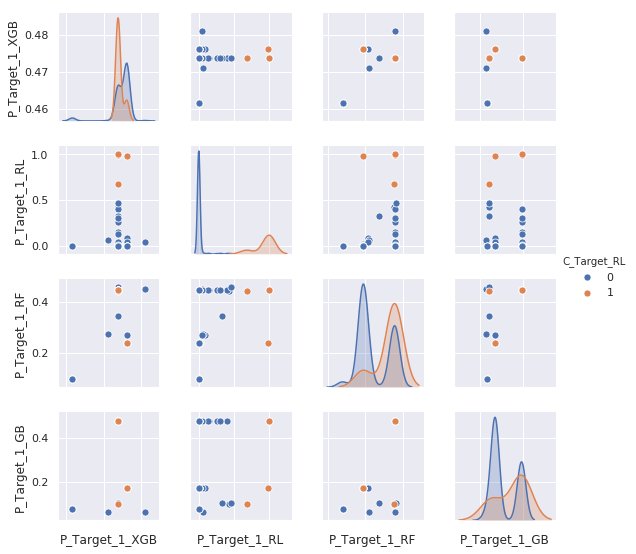

In [16]:
lista_vars = ['P_Target_1_XGB','P_Target_1_RL','P_Target_1_RF','P_Target_1_GB']
TuringDVPairPlot(score_compare_valida[['P_Target_1_XGB','P_Target_1_RL','P_Target_1_RF','P_Target_1_GB','C_Target_RL']],lista_vars,targetname='C_Target_RL',sizegraph=2,plot_s = 50)

'TuringNormalProbPlot'

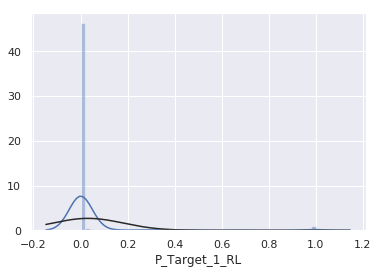

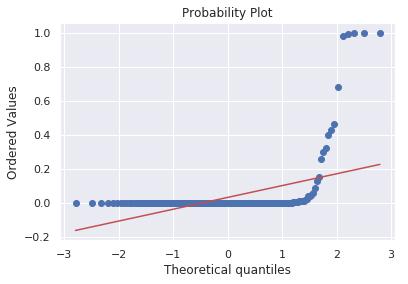

In [17]:
TuringNormalProbPlot(score_compare_valida,'P_Target_1_RL')

'TuringNormalProbPlot'

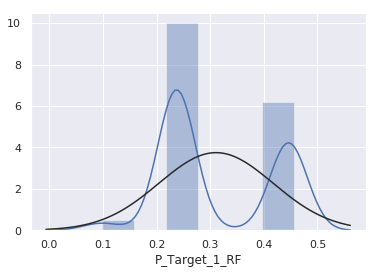

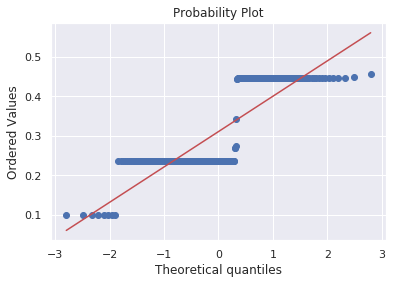

In [18]:
TuringNormalProbPlot(score_compare_valida,'P_Target_1_RF')

#### Verificando a ordenação do score gerado pelo modelo implantado

In [19]:
# Lendo tabela de desenvolvimento original do bucket da POC
path_file = 'Projetos/'+'Projeto_'+id_projeto+'/Modelo_Id_'+id_projeto+'/Modeltrain/'+'dbi_ordenacao.csv'
df_ord = TuringReadS3CSVFile(nm_bucket,path_file,sep=',')
df_ord.head(10)

,Unnamed: 0,id_ranks,tx_evento,qt_rank
0,0,0,0.947059,170
1,1,1,0.810811,37
2,2,2,1.000000,6
3,3,3,1.000000,4
4,4,4,0.566265,83
5,5,5,0.493151,73
6,6,6,0.000000,1
7,7,7,0.270833,48
8,8,8,0.060000,50
9,9,9,0.100239,419


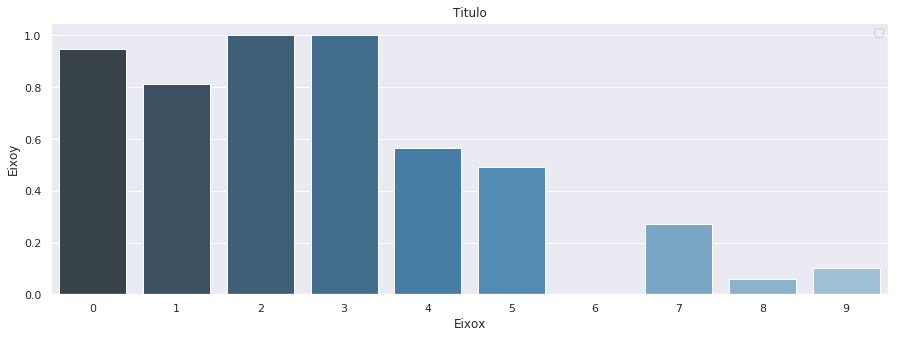

'TuringBarPlot'

In [20]:
TuringBarPlot(df_ord,'id_ranks','tx_evento',5,15,'Eixox','Eixoy','Titulo','')